In [2]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
f=open('hurriyet.txt','r',encoding='utf8')# okumak icin
text=f.read()
t_list=text.split('\n')# cümleler birbirinden yeni satir ile ayrildigi icin \n

corpus=[]

for cumle in t_list:
    corpus.append(cumle.split())# cümle tokenlestiriliyor ve corpus a ekleniyor

In [5]:
print(corpus[:10])# ilk 10 cümleyi yazdiriyor. her cümlede farkli kelimelerden olusuyor

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [7]:
model=Word2Vec(corpus,vector_size=100,window=5,min_count=5, sg=1)# size:vektör uzunlugu, window:kac tane kelimeye bakacagi,
#min_count:enaz 5 tane gecen kelimeleri aliyor, sg=1:skip gram algoritmasini kullan

In [8]:
model.wv['ankara']# vektör uzunlugu 100

array([-1.7296359e-01, -5.2737299e-02,  1.1141068e-01, -2.9287074e-02,
        3.8125199e-01, -1.4710230e-01, -2.8056753e-01,  5.8144587e-01,
       -6.0931665e-01, -2.5023101e-04,  3.3016723e-02, -4.1472638e-01,
       -2.4099724e-01,  4.3575618e-01, -3.6334625e-01,  4.5483962e-01,
        7.8731102e-01,  4.9873758e-02,  2.3608969e-01, -4.1819867e-01,
       -3.0047596e-01,  5.9514862e-01,  5.1372021e-01, -5.3395426e-01,
       -4.9672261e-02, -3.9611161e-02, -4.4162038e-01, -4.2385107e-01,
       -6.4931673e-01,  4.5960835e-01,  3.5608307e-01,  2.8862485e-01,
       -2.3002712e-01, -2.2145206e-02, -9.7894512e-02, -2.0293814e-01,
       -5.9423363e-01, -2.3454931e-01,  2.6178455e-02, -4.2863327e-01,
        5.3472543e-01,  3.4226608e-01,  4.6600345e-01,  2.8627923e-01,
        4.3754390e-01,  4.3548316e-01, -2.6438752e-01,  8.7996840e-02,
        1.7638935e-01, -2.4644966e-01,  2.0187040e-01,  4.0388447e-03,
       -3.2785468e-02,  5.7091504e-02, -1.4388953e-01,  1.5370843e-01,
      

In [10]:
model.wv.most_similar('hollanda')# corpus da hollanda ya yakin olan 10 kelime yi getirir

[('danimarka', 0.8270155787467957),
 ('avusturya', 0.8043339252471924),
 ('belçika', 0.7840869426727295),
 ('almanya', 0.7656735777854919),
 ('ispanya', 0.7609575390815735),
 ('letonya', 0.7463870048522949),
 ('fransa', 0.7406113147735596),
 ('kanada', 0.7391726970672607),
 ('avustralya', 0.7203019261360168),
 ('finlandiya', 0.7186217308044434)]

In [11]:
model.wv.most_similar('pazartesi')

[('perşembe', 0.927455723285675),
 ('cumartesi', 0.9195760488510132),
 ('salı', 0.8995999693870544),
 ('günü', 0.8931978940963745),
 ('çarşamba', 0.8860653042793274),
 ('cuma', 0.8762162327766418),
 ('akşamı', 0.8698455095291138),
 ('pazar', 0.8366338014602661),
 ('sabahı', 0.8250896334648132),
 ('gününden', 0.7610134482383728)]

In [15]:
model.save('word2vec.model')

In [16]:
model=Word2Vec.load('word2vec.model')

<center> Görsellestirme</center>

In [26]:
def closestwords_tsneplot(model, word):
    word_vectors=np.empty((0,100))
    word_labels=[word]
    
    close_words=model.wv.most_similar(word)
    
    word_vectors=np.append(word_vectors, np.array([model.wv[word]]), axis=0)# axis olmazsa düzlestirilir
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors= np.append(word_vectors,np.array([model.wv[w]]),axis=0)
        
    tsne=TSNE(random_state=0, perplexity=10)# görsellestirmek icin
    Y=tsne.fit_transform(word_vectors)# tüm kelimelerin x,y koordinatlari var
    
    x_coords=Y[:,0]
    y_coords=Y[:,1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels,x_coords, y_coords):
        plt.annotate(label, xy= (x,y), xytext=(5,-2), textcoords='offset points')
    
    plt.show()
    
    
    
    
        

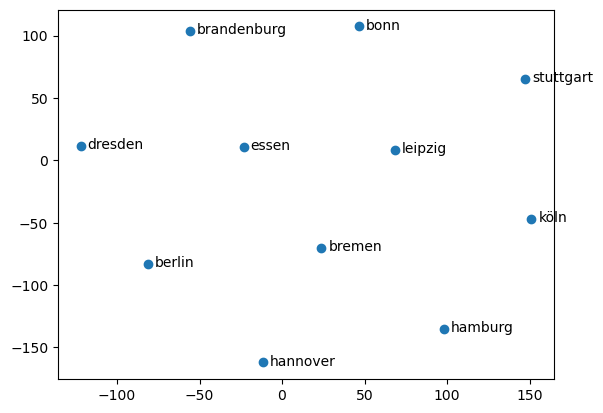

In [27]:
closestwords_tsneplot(model,'berlin')